# **Big Mart Sales Prediction**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br>
  - **7.2** [**Post Profiling Report**](#Section72)<br>
  - **7.3** [**Encoding the Categorical Data**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Model Development & Evaluation without Tuning**](#Section81)<br>
  - **8.2** [**Hyperparameter Tuning**](#Section82)<br>
  - **8.3** [**Model Development & Evaluation after Tuning**](#Section83)<br>
  
**9.** [**Conclusion**](#Section9)<br>



<a id=section1></a>

---
<a name = Section1></a>
# **1. Introduction**
---
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.


---
<a name = Section2></a>
# **2. Problem Statement**
---
- BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.
-  So need to build a Regression model using the dataset on outlet sales.

<br> 
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcReMFVcZG0f5HQ2Mw-cZuFTV3J2KwsToCQnuA&usqp=CAU" width="600" height="300" /></center>



---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
# !pip install -q datascience                   # Package that is required by pandas profiling
# !pip install -q pandas-profiling              # Library to generate basic statistics about data

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
# !pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                      # Importing for labeling the categorical features
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.ensemble import AdaBoostRegressor                      # Importing for Ada Boosting model
from sklearn.ensemble import GradientBoostingRegressor              # Importing for Gradient Boosting model
from sklearn.ensemble import RandomForestRegressor                  # Importing for Ada RandomForest model
from sklearn.ensemble import StackingRegressor                      # Importing for Stacking ensemble model
from sklearn.metrics import r2_score                                # Importing for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error # Importing for model evaluation
from scipy.stats import chi2_contingency                            # Importing for Chi-square test
from sklearn.model_selection import RandomizedSearchCV              # To tune the models
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The train set contains 8523 rows and 12 columns and The last column Item_Outlet_Sales is the target variable.
- The test set contains 5681 rows and 11 columns and The test set doesn’t contain the Item_Outlet_Sales column.

| **Column Name**					|  **Description** |
|:--|:--|							
| Item_Identifier					|  Unique product ID |
| Item_Weight						|  Weight of product |
| Item_Fat_Content					|  Whether the product is low fat or not |
| Item_Visibility					|  The % of total display area of all products in a store allocated to the particular product |
| Item_Type							|  The category to which the product belongs |
| Item_MRP							|  Maximum Retail Price (list price) of the product |
| Outlet_Identifier					|  Unique store ID |
| Outlet_Establishment_Year			|  The year in which store was established |
| Outlet_Size						|  The size of the store in terms of ground area covered |
| Outlet_Location_Type				|  The type of city in which the store is located |
| Outlet_Type						|  Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales					|  Sales of the product in the particular store. This is the outcome variable to be predicted. |

In [4]:
# Importing data using pd.read_csv
sales_train = pd.read_csv("train_data.csv")     
sales_test = pd.read_csv("test_data.csv")
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# make copy of train & test
train_original = sales_train.copy()
test_original = sales_test.copy()

<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
print("Shape of our sales train data is :", sales_train.shape)
print("Shape of our sales test data is :", sales_test.shape)

Shape of our sales train data is : (8523, 12)
Shape of our sales test data is : (5681, 11)


- Shape of our sales train data is : (8523, 12)
- Shape of our sales test data is : (5681, 11)

In [7]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Observation:**

- There are **null values present** in Item_Weight and Outlet_Size.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [9]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Observation:**

- The **average** Item_Weight is 12.85 KG and maximum around 22 KG.

- **Minimum** Item_MRP is 31 Rs while **Maximum** is 266 Rs.

- the **average** item outlet sales is around 2181.

In [10]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [11]:
# # need to install for to fix the cat_join error.
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [12]:
# profile = ProfileReport(df = sales_train)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

**Uncomment and run** the below to generate the profiling report.

In [13]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**


- Reports shows that the **number of variables**	in our data is **12**.

- **Number of observations(rows)** is	8523

- **Duplicate rows** are **0**

- There is huge amount of **missing data** in Item_Weight and Outlet_Size.

- For full details checkout the report.

<a name = Section52></a>
### **5.2 Identification & Handling of Missing Data**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **zero data**.

In [14]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = sales_train.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = sales_train.isnull().sum().values

#Calculating the percentage of null values
nullpercent = sales_train.isnull().sum().values/sales_train.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = sales_train[sales_train == 0].count().values

#Calculating the Percentage of Zero
zero_percent = sales_train[sales_train == 0].count().values / sales_train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Null Frequency,0.0,1463.00,0.0,0.00,0.0,0.0,0.0,0.0,2410.00,0.0,0.0,0.0
Missing Null %age,0.0,17.17,0.0,0.00,0.0,0.0,0.0,0.0,28.28,0.0,0.0,0.0
Zero Frequency,0.0,0.00,0.0,526.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Missing %age,0.0,0.00,0.0,6.17,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [15]:
#This function fill out missing values
def dataprep(sales_train):
  sales_train['Item_Weight'] = np.where(sales_train['Item_Weight'].isna(), sales_train['Item_Weight'].median(skipna=True), sales_train['Item_Weight'])
  sales_train['Outlet_Size'] = np.where(sales_train['Outlet_Size'].isna(), 'Medium', sales_train['Outlet_Size'])
  sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].replace('LF', 'Low Fat')
  sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
  sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].replace('reg', 'Regular')
  sales_train['Outlet_Age'] = 2022 - sales_train['Outlet_Establishment_Year'] 

  return sales_train
  



In [16]:
sales_train = dataprep(sales_train)

In [17]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [18]:
def dataprep(sales_test):
  sales_test['Item_Weight'] = np.where(sales_test['Item_Weight'].isna(), sales_test['Item_Weight'].median(skipna=True), sales_test['Item_Weight'])
  sales_test['Outlet_Size'] = np.where(sales_test['Outlet_Size'].isna(), 'Medium', sales_test['Outlet_Size'])
  sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('LF', 'Low Fat')
  sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
  sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('reg', 'Regular')
  sales_test['Outlet_Age'] = 2022 - sales_test['Outlet_Establishment_Year'] 

  return sales_test

In [19]:
sales_test= dataprep(sales_test)

In [20]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,23
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,15
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,24
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,15
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,37


In [21]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [22]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Outlet_Age                 5681 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 532.7+ KB


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [23]:
sales_train.skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Outlet_Age                   0.396641
dtype: float64

In [24]:
sales_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

**<h4>Question: What is the frequency and proportion of Item_Fat_Content?</h4>**

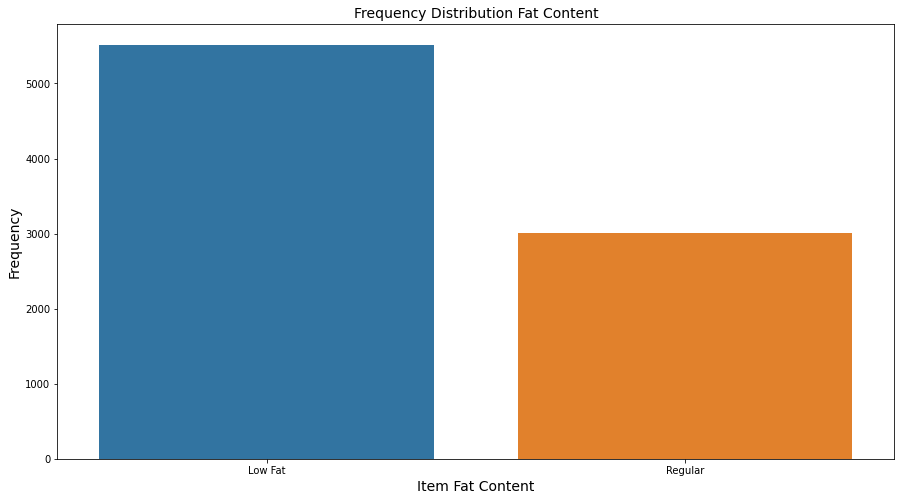

In [25]:
# setting a figure of size of 20 x 7 inches
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'Item_Fat_Content', data = sales_train)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Item Fat Content', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution Fat Content', size = 14)

# Display the plot
plt.show()

**<h4>Question: What is the frequency and proportion of outlet_type?</h4>**

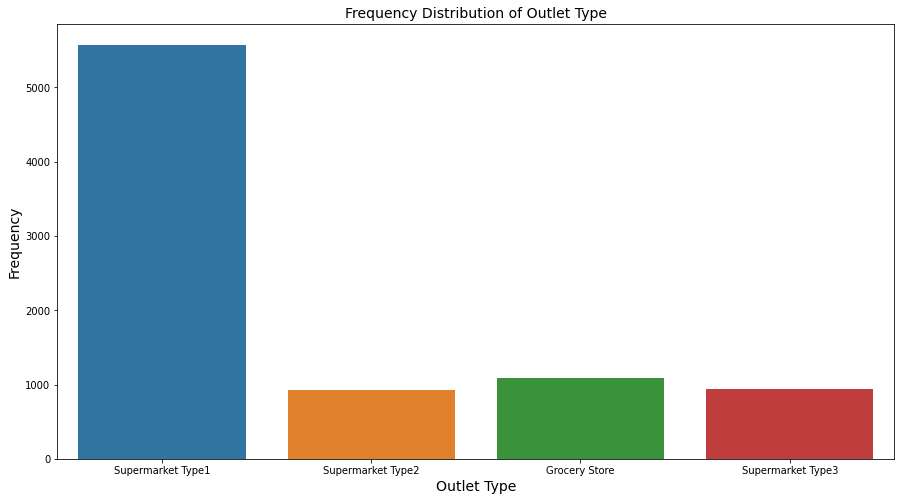

In [26]:
# setting a figure of size of 15 x 8 inches
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'Outlet_Type', data = sales_train)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Outlet Type', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of Outlet Type', size = 14)

# Display the plot
plt.show()

**<h4>Question: Is there any relation between Item MRP and Item Outlet Sales?</h4>**

In [27]:
sales_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

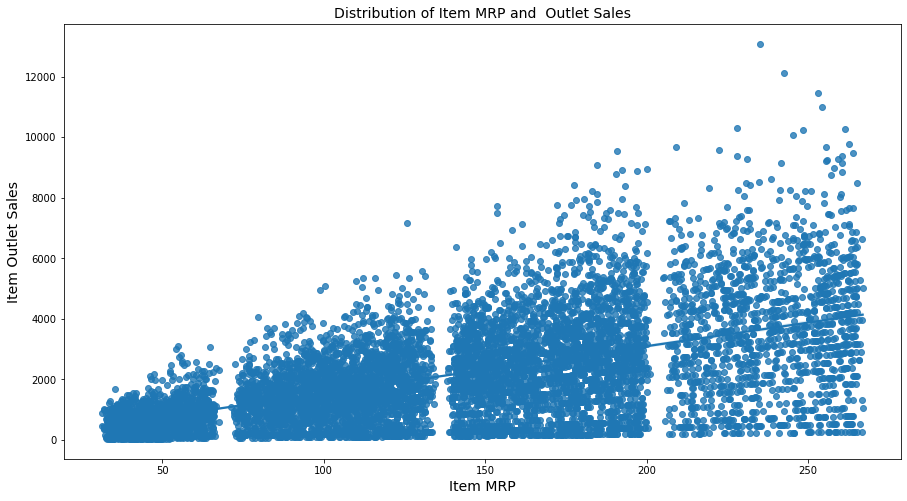

In [28]:
# setting a figure of size of 15 x 8 inches
fig = plt.figure(figsize = [15, 8])

# sns.countplot(x = 'Outlet_Type', data = sales_train)
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=sales_train)


# Adding cosmetics to graph
plt.xlabel(xlabel = 'Item MRP', size = 14)
plt.ylabel(ylabel = 'Item Outlet Sales', size = 14)
plt.title(label = 'Distribution of Item MRP and  Outlet Sales', size = 14)

# Display the plot
plt.show()

**<h4>Question: Is there any outlier in policy data?</h4>**

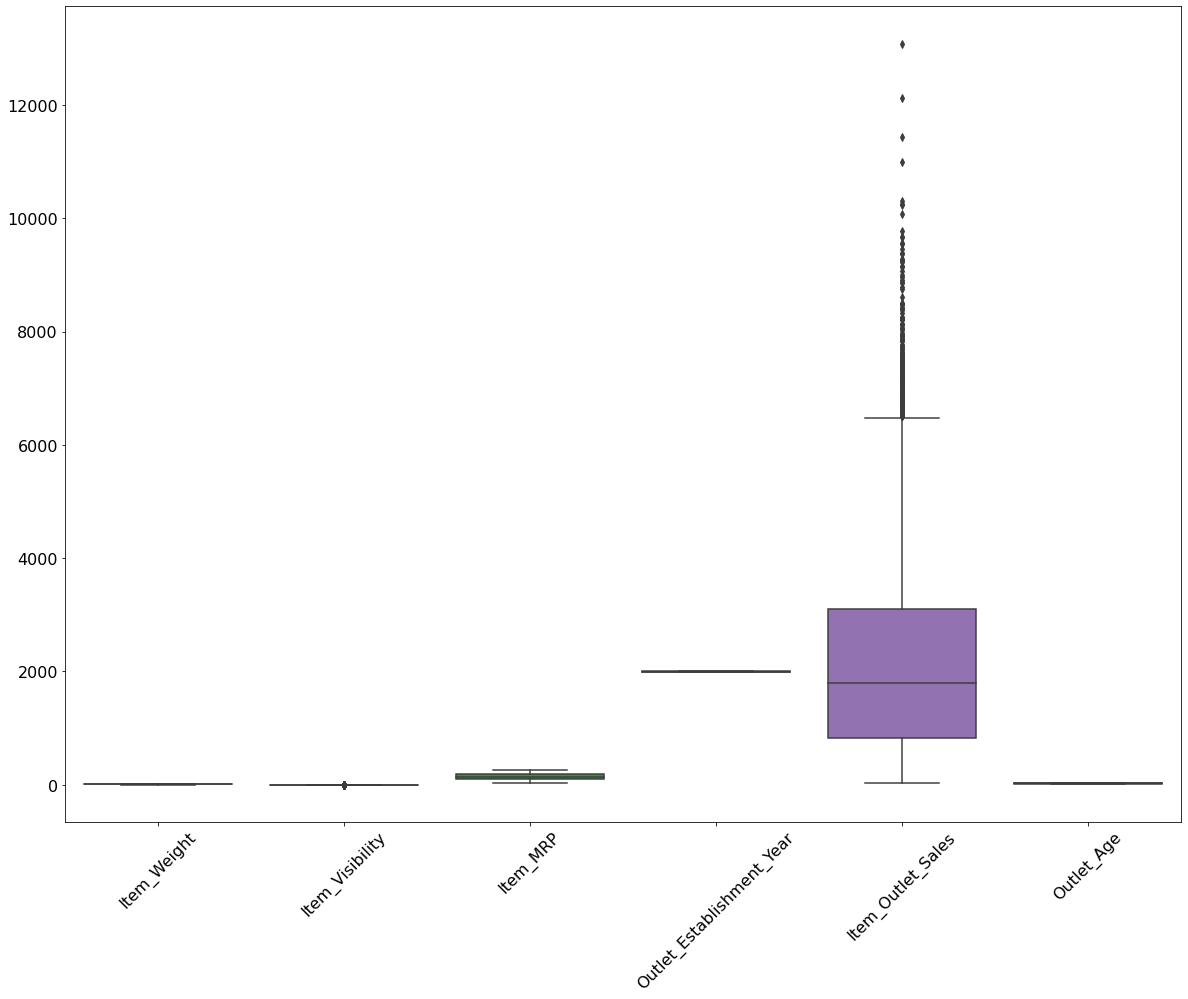

In [29]:
plt.figure(figsize=(20,15))

sns.boxplot(data=sales_train)

plt.xticks(fontsize=16 ,rotation=45)
plt.yticks(fontsize=16)

plt.show()

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**


<a name = Section71></a>
### **7.1 Feature Selection**

- we will **visualize  the correlation** of input features **using Heatmap**.


Text(0.5, 1.0, 'Correlation between features')

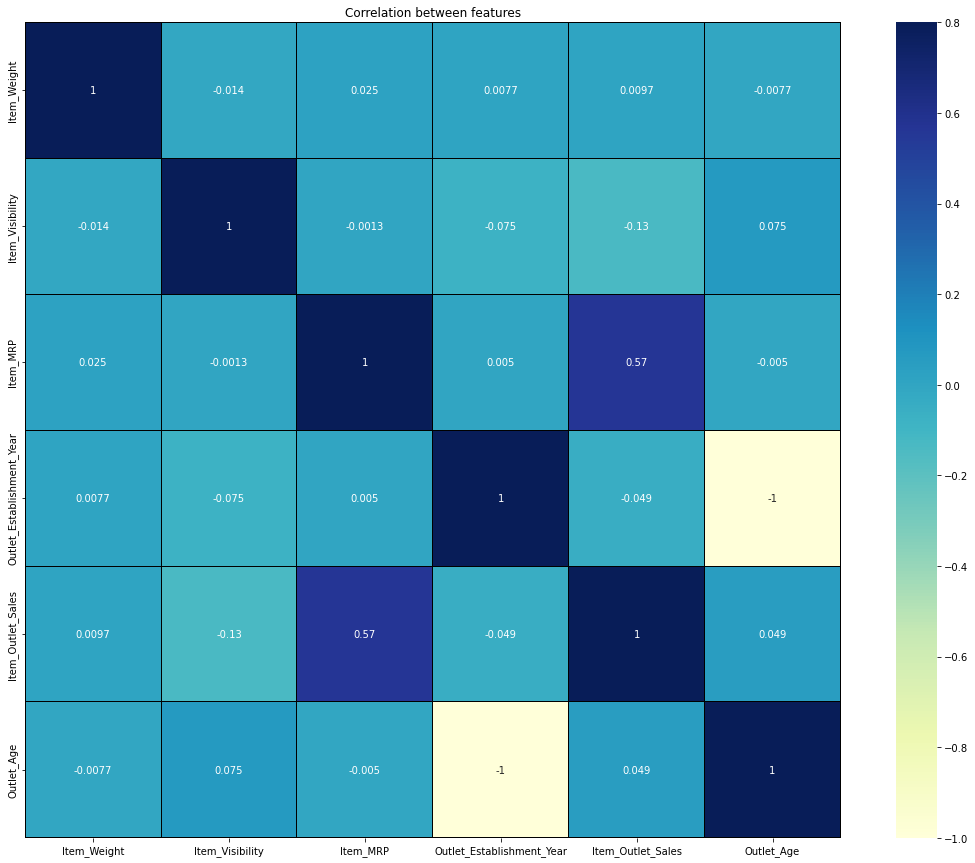

In [30]:
corr = sales_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:** 

- Item_visibility is negatively corelated with Item_Outlet_sales.
- Item_MRP are highly positively corelated with Item_Outlet_sales.

In [31]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [32]:
def chi_test(var1, var2):
  table = pd.crosstab(var1, var2)
  _, p, _, _ = chi2_contingency(table)
  
  # interpret p-value
  alpha = 0.05
  print("p value is " + str(p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (H0 holds true)')

  return table  



In [33]:
chi_test(sales_train['Outlet_Type'], sales_train['Outlet_Location_Type'])

p value is 0.0
Dependent (reject H0)


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


In [34]:
chi_test(sales_train['Outlet_Location_Type'], sales_train['Outlet_Size'])

p value is 0.0
Dependent (reject H0)


Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,1855,930
Tier 3,932,2418,0


In [35]:
chi_test(sales_train['Item_Fat_Content'], sales_train['Outlet_Location_Type'])

p value is 0.9404540785482409
Independent (H0 holds true)


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Fat_Content,,,
Low Fat,1540,1809,2168
Regular,848,976,1182


In [36]:
chi_test(sales_train['Item_Fat_Content'], sales_train['Item_Type'])

p value is 0.0
Dependent (reject H0)


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


<a name = Section72></a>
### **7.2 Post-Profiling Report**

- After  **filling missing value**, we will now look at the report again.

In [37]:
# profile = ProfileReport(df = sales_train_df)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

In [38]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**


- For full details after the data processing checkout the report.

<a name = Section73></a>

### **7.3 Encoding Categorical Features**

In [39]:
sales_train.dtypes #Checking for data types of features

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
dtype: object

In [40]:
def encoding(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype == 'object' :
      data[i]=le.fit_transform(data[i])
  
  return data    

In [41]:
train= encoding(sales_train)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,23
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,13
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,23
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,24
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,35


In [42]:
test= encoding(sales_test)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,23
1,1067,8.300,1,0.038428,4,87.3198,2,2007,1,1,1,15
2,1406,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,24
3,809,7.315,0,0.015388,13,155.0340,2,2007,1,1,1,15
4,1184,12.500,1,0.118599,4,234.2300,5,1985,1,2,3,37


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 865.7 KB


In [44]:
train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace=True, axis=1)

In [45]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace=True, axis=1)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int64  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int64  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int64  
 6   Outlet_Location_Type  8523 non-null   int64  
 7   Outlet_Type           8523 non-null   int64  
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5681 non-null   float64
 1   Item_Fat_Content      5681 non-null   int64  
 2   Item_Visibility       5681 non-null   float64
 3   Item_Type             5681 non-null   int64  
 4   Item_MRP              5681 non-null   float64
 5   Outlet_Size           5681 non-null   int64  
 6   Outlet_Location_Type  5681 non-null   int64  
 7   Outlet_Type           5681 non-null   int64  
 8   Outlet_Age            5681 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 399.6 KB


In [48]:
print(train.shape)
print(test.shape)

(8523, 10)
(5681, 9)


<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [49]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [50]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,23
1,5.92,1,0.019278,14,48.2692,1,2,2,13
2,17.50,0,0.016760,10,141.6180,1,0,1,23
3,19.20,1,0.000000,6,182.0950,1,2,0,24
4,8.93,0,0.000000,9,53.8614,0,2,1,35


In [51]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [52]:
# split  data into training and testing sets of 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (6818, 9) (6818,)
Testing Data Shape: (1705, 9) (1705,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Random Forest Regression, AdaBoostingRegressor, GradientBoostingRegressor and StackingRegressor using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **RMSE**, also we will check for **R2**.



<a name = Section81></a>
### **8.1 Model Development & Evaluation without tuning**

In [54]:
# Instantiating various classifiers
clfs = [RandomForestRegressor(),
        AdaBoostRegressor(n_estimators=100, learning_rate=.8),
        GradientBoostingRegressor(n_estimators=200)]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train RMSE and r2 of the model
  train_mse=mean_squared_error(y_train, y_pred_train)
  rmse_train=np.sqrt(train_mse)
  r2_train = r2_score(y_train, y_pred_train)

  print('Performance Metric of', model_name, ':')
  print("the train RMSE value= ", round(rmse_train,2))
  print("the R2 value= ", round(r2_train,2))

  # Calculate the test RMSE and r2 of the model
  test_mse=mean_squared_error(y_test, y_pred)
  rmse_test=np.sqrt(test_mse)
  r2_test = r2_score(y_test, y_pred)

  print("the test RMSE value= ", round(rmse_test,2))
  print("the test R2 value= ", round(r2_test,2))

  print('----------------------------------------\n')

Performance Metric of RandomForestRegressor :
the train RMSE value=  431.02
the R2 value=  0.94
the test RMSE value=  1100.84
the test R2 value=  0.55
----------------------------------------

Performance Metric of AdaBoostRegressor :
the train RMSE value=  1276.17
the R2 value=  0.45
the test RMSE value=  1234.27
the test R2 value=  0.44
----------------------------------------

Performance Metric of GradientBoostingRegressor :
the train RMSE value=  1005.82
the R2 value=  0.66
the test RMSE value=  1045.65
the test R2 value=  0.6
----------------------------------------



Stacking Regressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

estimators = [('rf',RandomForestRegressor(n_estimators=50, max_depth = 5)),
              ('knn', KNeighborsRegressor()),
              ('lr', LinearRegression())]

sr = StackingRegressor(estimators = estimators)
sr.fit(X_train, y_train)
preds_stack_train = sr.predict(X_train)
preds_stack_test = sr.predict(X_test)



train_mse=mean_squared_error(y_train, preds_stack_train)
rmse_train=np.sqrt(train_mse)
r2_train = r2_score(y_train, preds_stack_train)

# Calculate the train RMSE and r2 of the model
print("the train RMSE value= ", round(rmse_train,2))
print("the R2 value= ", round(r2_train,2))

# Calculate the test RMSE and r2 of the model
test_mse=mean_squared_error(y_test, preds_stack_test)
rmse_test=np.sqrt(test_mse)
r2_test = r2_score(y_test, preds_stack_test)

print("the test RMSE value= ", round(rmse_test,2))
print("the test R2 value= ", round(r2_test,2))

the train RMSE value=  1072.85
the R2 value=  0.61
the test RMSE value=  1020.02
the test R2 value=  0.62


<a name = Section82></a>
### **8.2 Hyperparameter Tuning**

- The **base-class** **Random Forest** and **Gradient Bosting Regressor** models **perform well** on our data.

- We will **tune** these models to find the **optimal parameters**.

In [ ]:
# Creating a parameter grid for Random Forest and Gradient Boost
import time
param_random_rfc = { 'n_estimators': [50, 100, 500, 1000],
                  'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['squared_error', 'absolute_error', 'poisson']}

param_random_grad = {'n_estimators': [50, 100, 500, 1000],
                    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}
                  

# Putting the parameters in a list
param_grid = [param_random_rfc, param_random_grad]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating models
clfs = [RandomForestRegressor(), GradientBoostingRegressor()]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying RandomSearchCV on the model
  cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid[i], cv= 5)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1

Time taken for tuning RandomForestRegressor  is:  3399.42 sec
----------------------------------------

Time taken for tuning GradientBoostingRegressor  is:  571.49 sec
----------------------------------------



In [ ]:
print(best_scores)
print(best_params)
print(best_models)

[0.5911764903301112, 0.5887671673974701]
[{'n_estimators': 500, 'min_samples_split': 9, 'max_depth': 7, 'criterion': 'squared_error'}, {'n_estimators': 1000, 'min_samples_split': 8, 'max_depth': 4, 'loss': 'absolute_error'}]
[RandomForestRegressor(max_depth=7, min_samples_split=9, n_estimators=500), GradientBoostingRegressor(loss='absolute_error', max_depth=4,
                          min_samples_split=8, n_estimators=1000)]


<a name = Section83></a>
### **8.3 Model Development & Evaluation after Tuning**

- In this section, we will **fit** the **best models** on our train data and **test** those models.

In [ ]:
for clf in best_models:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train RMSE and r2 of the model
  train_mse=mean_squared_error(y_train, y_pred_train)
  rmse_train=np.sqrt(train_mse)
  r2_train = r2_score(y_train, y_pred_train)

  print('Performance Metric of', model_name, ':')
  print("the train RMSE value= ", round(rmse_train,2))
  print("the R2 value= ", round(r2_train,2))

  # Calculate the test RMSE and r2 of the model
  test_mse=mean_squared_error(y_test, y_pred)
  rmse_test=np.sqrt(test_mse)
  r2_test = r2_score(y_test, y_pred)

  print("the test RMSE value= ", round(rmse_test,2))
  print("the test R2 value= ", round(r2_test,2))

  print('----------------------------------------\n')

Performance Metric of RandomForestRegressor :
the train RMSE value=  1037.33
the R2 value=  0.64
the test RMSE value=  1028.13
the test R2 value=  0.61
----------------------------------------

Performance Metric of GradientBoostingRegressor :
the train RMSE value=  1061.88
the R2 value=  0.62
the test RMSE value=  1028.95
the test R2 value=  0.61
----------------------------------------



**Random Forest give better result**

In [57]:
rf= RandomForestRegressor(max_depth=7, min_samples_split=9, n_estimators=500)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

# Calculate the train RMSE and r2 of the model
train_mse=mean_squared_error(y_train, y_pred_train)
rmse_train=np.sqrt(train_mse)
r2_train = r2_score(y_train, y_pred_train)
print("the train RMSE value= ", round(rmse_train,2))
print("the R2 value= ", round(r2_train,2))

# Calculate the test RMSE and r2 of the model
test_mse=mean_squared_error(y_test, y_pred)
rmse_test=np.sqrt(test_mse)
r2_test = r2_score(y_test, y_pred)

print("the test RMSE value= ", round(rmse_test,2))
print("the test R2 value= ", round(r2_test,2))


the train RMSE value=  1037.86
the R2 value=  0.64
the test RMSE value=  1028.84
the test R2 value=  0.61


Observation: Random Forest Regressor after parameter tuning is better model than other models. so we will use the same for final submission on unseen test data.

In [59]:
test['Item_Outlet_Sales'] = rf.predict(test)

In [60]:
sam_sub=pd.read_csv("/content/sample_submission_8RXa3c6.csv")

In [61]:
sam_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [62]:
sam_sub['Item_Outlet_Sales']= test['Item_Outlet_Sales']

In [63]:
sam_sub.to_csv('final_submission_rf.csv', index=False)

In [64]:
sam_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1659.057329
1,FDW14,OUT017,1350.663878
2,NCN55,OUT010,562.914428
3,FDQ58,OUT017,2428.264032
4,FDY38,OUT027,6644.711406


**Creation of Sales Prediction App**

In [65]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 41.5 MB/s 
     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 270 kB 76.8 MB/s 
     |████████████████████████████████| 112 kB 82.6 MB/s 
     |████████████████████████████████| 2.3 MB 93.3 MB/s 
     |████████████████████████████████| 54 kB 4.2 MB/s 
     |████████████████████████████████| 84 kB 1.8 MB/s 
     |████████████████████████████████| 212 kB 80.4 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 80 kB 5.4 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 856 kB 68.5 MB/s 
     |████████████████████████████████| 593 kB 65

In [66]:
import pickle
import gradio as gr

In [69]:
with open('filename.pkl', 'wb') as f:
  pickle.dump(rf, f)

In [71]:
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Age'],
      dtype='object')

In [72]:
def appfunction(Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Size, Outlet_Location_Type, Outlet_Type, Outlet_Age):
  with open('filename.pkl', 'rb') as f:
    clf=pickle.load(f)
    preds= clf.predict([[Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Size, Outlet_Location_Type, Outlet_Type, Outlet_Age]])
    return preds

In [73]:
Item_Weight = gr.Number(label = "Please input the weight of the product")
Item_Fat_Content = gr.Number(label = "Please provide fat content 1 is low fat and 0 is regular fat")
Item_Visibility = gr.Number(label = "Please provide the visbility values between 0 and 1" )
Item_Type = gr.Number(label = "Enter type from 1-8")
Item_MRP = gr.Number(label = "Enter the price of the product")
Outlet_Size = gr.Number(label = "Enter size as 0,1 or 2")
Outlet_Location_Type = gr.Number(label = "Enter a type 0,1 or 2")
Outlet_Type = gr.Number(label = "Enter a type 0,1,2")
Outlet_Age = gr.Number(label = "Enter Years of Business")


output = gr.Textbox()

In [ ]:
app = gr.Interface(fn = appfunction,
                   inputs = [Item_Weight, Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age], 
                   outputs = output)
app.launch(debug=True)

<a name = Section9></a>

---
# **9. Conclusion**
---

- This big mart sales prediction we tried multiple models like Random forest, AdaBoosting, Gradient Boosting, Stacking.
- Also for better performance we tried RamdomizedSearchCV alog as hypermater tuning and we got the better result on Random Forest Regressor as compare to other models.
- So We will use the Random Forest model for final submission on unseen test data.